In [1]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
Emotions= pd.read_csv('/kaggle/input/emotion/emotion (1).csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,labels
0,-258.990326,132.193741,5.314349,21.521330,-24.357752,-2.237025,-24.086287,-9.530801,-20.967497,-4.285268,...,-0.953883,1.146237,1.829600,2.893938,1.310414,1.626812,2.758013,4.257873,3.918041,male_happy
1,-258.667152,132.047682,5.236842,21.529129,-24.335813,-2.170860,-24.135509,-9.465332,-20.959675,-4.215839,...,-0.906946,1.140402,1.826270,2.867984,1.350153,1.576485,2.766849,4.228887,3.915566,male_happy
2,-301.181824,128.659897,4.380285,9.940308,-23.697367,-7.601327,-25.921268,-13.189119,-19.924520,-0.300373,...,3.321182,3.191138,3.419615,3.112536,1.654553,3.749860,5.546700,4.269989,1.401541,male_happy
3,-274.135437,142.405472,-2.322214,21.200804,-27.737436,-1.496183,-26.762552,-10.112954,-21.643480,-3.658734,...,-1.149690,1.346368,2.298612,3.353943,1.820001,2.129130,2.610373,4.910376,4.944275,male_happy
4,-274.135437,142.405472,-2.322214,21.200804,-27.737436,-1.496183,-26.762552,-10.112954,-21.643480,-3.658734,...,-1.149690,1.346368,2.298612,3.353943,1.820001,2.129130,2.610373,4.910376,4.944275,male_happy


In [3]:
X = Emotions.drop('labels',axis = 1)
Y = Emotions['labels']

In [4]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [5]:
# since it is a multiclass classifier, i will perform onehotencoding
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,shuffle = True)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((48648, 40), (48648, 14), (12162, 40), (12162, 14))

In [7]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((48648, 40), (48648, 14), (12162, 40), (12162, 14))

CNN

In [8]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Dense,AveragePooling1D,Dropout,add,BatchNormalization,LSTM,Flatten,MaxPooling1D,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from keras.activations import relu, softmax
from sklearn.metrics import confusion_matrix,classification_report

In [9]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((48648, 40, 1), (48648, 14), (12162, 40, 1), (12162, 14))

In [10]:
my_model=Sequential()
my_model.add(Conv1D(256, kernel_size=7, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())


my_model.add(Conv1D(64, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))
        
my_model.add(Flatten())
my_model.add(Dense(units=32, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(units=14, activation='softmax'))
my_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 256)           2048      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 256)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 20, 256)          1024      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 128)           229504    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 128)          0         
 1D)                                                             
                                                        

In [11]:
history = my_model.fit(x_traincnn, y_train, batch_size=32, epochs=50, validation_data=(x_testcnn, y_test))

Epoch 1/50
1521/1521 [==============================] - 68s 43ms/step - loss: 1.9612 - accuracy: 0.3322 - val_loss: 1.3898 - val_accuracy: 0.4972
Epoch 2/50
1521/1521 [==============================] - 67s 44ms/step - loss: 1.5004 - accuracy: 0.4572 - val_loss: 1.2415 - val_accuracy: 0.5330
Epoch 3/50
1521/1521 [==============================] - 65s 43ms/step - loss: 1.3579 - accuracy: 0.5005 - val_loss: 1.1584 - val_accuracy: 0.5608
Epoch 4/50
1521/1521 [==============================] - 68s 45ms/step - loss: 1.2660 - accuracy: 0.5297 - val_loss: 1.0696 - val_accuracy: 0.5884
Epoch 5/50
1521/1521 [==============================] - 66s 43ms/step - loss: 1.1910 - accuracy: 0.5552 - val_loss: 1.0411 - val_accuracy: 0.6071
Epoch 6/50
1521/1521 [==============================] - 65s 42ms/step - loss: 1.1283 - accuracy: 0.5791 - val_loss: 0.9785 - val_accuracy: 0.6233
Epoch 7/50
1521/1521 [==============================] - 65s 42ms/step - loss: 1.0638 - accuracy: 0.6042 - val_loss: 0.9261 -

In [12]:
print("Accuracy of our model on test data : " , round(my_model.evaluate(x_testcnn,y_test)[1],2)*100 , "%")


381/381 [==============================] - 3s 9ms/step - loss: 0.7184 - accuracy: 0.8219
Accuracy of our model on test data :  82.0 %


In [13]:
model_name = 'emotion_model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)   # adds file in folder
my_model.save(model_path)
print('Save model and weights at %s' % model_path)
model_json = my_model.to_json()
with open('model_json.json', 'w') as json_file:
    json_file.write(model_json)

Save model and weights at /kaggle/working/saved_models/emotion_model.h5


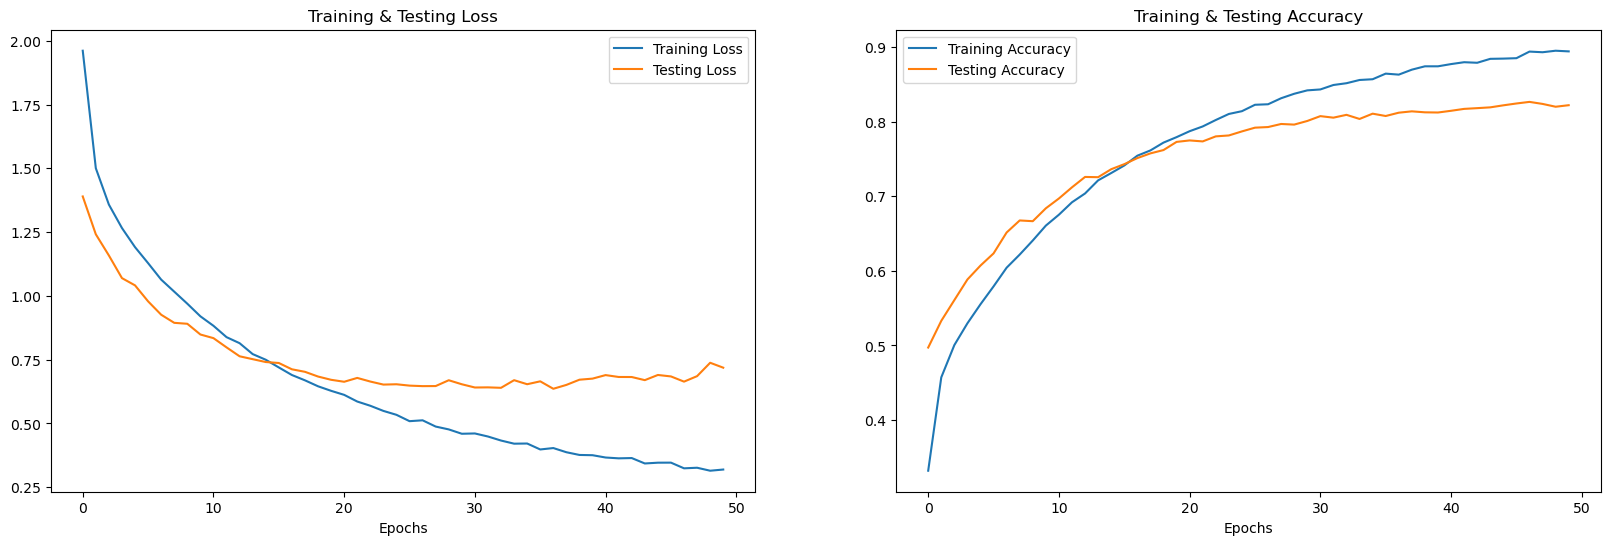

In [15]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

Confusion Matrix

In [16]:
# predicting on test data.
pred_test = my_model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

381/381 [==============================] - 4s 9ms/step


In [17]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

In [18]:
df

,Predicted Labels,Actual Labels
0,female_sad,female_sad
1,male_disgust,male_disgust
2,female_sad,female_sad
3,male_fear,male_fear
4,female_angry,female_angry
...,...,...
12157,female_fear,female_fear
12158,male_disgust,male_disgust
12159,female_disgust,female_angry
12160,female_neutral,female_neutral


In [20]:
import seaborn as sns

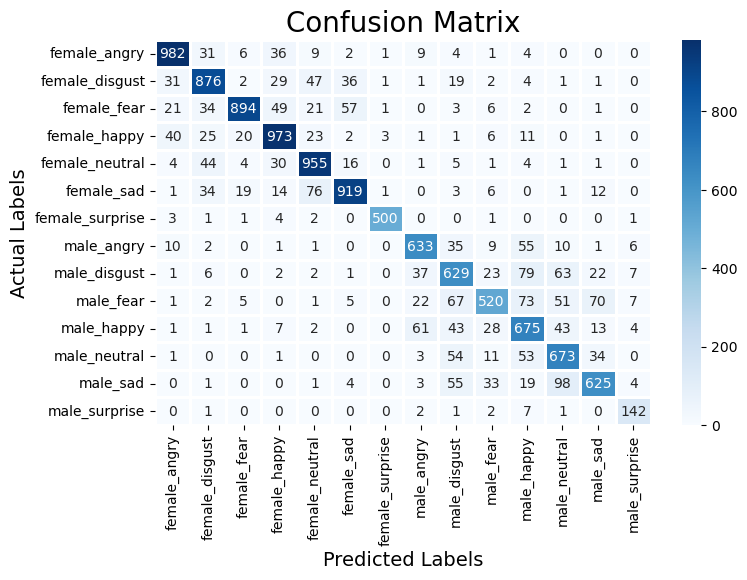

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

Classification report

In [29]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   female_angry       0.90      0.91      0.90      1085
 female_disgust       0.83      0.83      0.83      1050
    female_fear       0.94      0.82      0.88      1089
   female_happy       0.85      0.88      0.86      1106
 female_neutral       0.84      0.90      0.87      1066
     female_sad       0.88      0.85      0.86      1086
female_surprise       0.99      0.97      0.98       513
     male_angry       0.82      0.83      0.82       763
   male_disgust       0.68      0.72      0.70       872
      male_fear       0.80      0.63      0.71       824
     male_happy       0.68      0.77      0.72       879
   male_neutral       0.71      0.81      0.76       830
       male_sad       0.80      0.74      0.77       843
  male_surprise       0.83      0.91      0.87       156

       accuracy                           0.82     12162
      macro avg       0.83      0.83      0.82     12162
   weighted avg       0.83   